In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#See city data
city_data.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Read Ride Data
ride_data.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset

city_ride_data = pd.merge(city_data, ride_data, how="left", on="city")

# Display the data table for preview
city_ride_data.head(5)



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [9]:
# Obtain the x and y coordinates for each of the three city types

# Split city ride data in urban, suburban and rual ciites
urban_cities=city_ride_data[city_ride_data['type'] == 'Urban']
suburban_cities=city_ride_data[city_ride_data['type'] == 'Suburban']
rural_cities=city_ride_data[city_ride_data['type'] == 'Rural']

In [30]:
# Split city ride data in urban, suburban and rual ciites
urban_ride_count = urban_cities.groupby(['city']).count()['ride_id']
urban_avg_fare = urban_cities.groupby(['city']).mean()['fare']
urban_driver_count = urban_cities.groupby(['city']).mean()['driver_count']

suburban_ride_count = suburban_cities.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban_cities.groupby(['city']).mean()['fare']
suburban_driver_count = suburban_cities.groupby(['city']).mean()['driver_count']

rural_ride_count = rural_cities.groupby(['city']).count()['ride_id']
rural_avg_fare = rural_cities.groupby(['city']).mean()['fare']
rural_driver_count = rural_cities.groupby(['city']).mean()['driver_count']

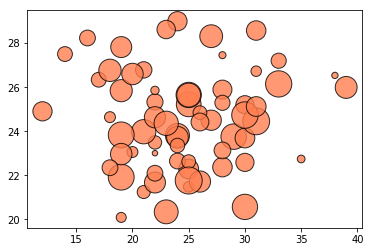

In [31]:
# Build the scatter plots for each city types - Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, 
            c='coral',
            edgecolor='black', 
            linewidths=1, 
            marker='o',
            alpha=0.8, 
            label='Urban')

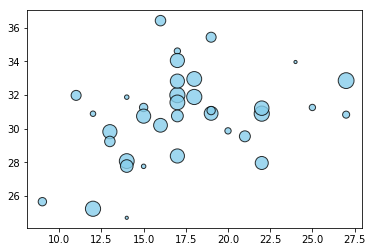

In [32]:
# Build the scatter plots for each city types - Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Suburban')

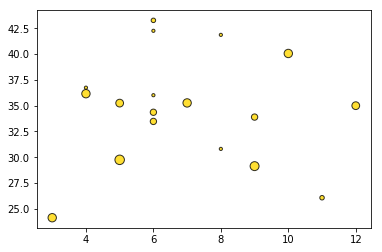

In [33]:
# Build the scatter plots for each city types - Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c='gold',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Rural')

TypeError: 'Legend' object is not callable

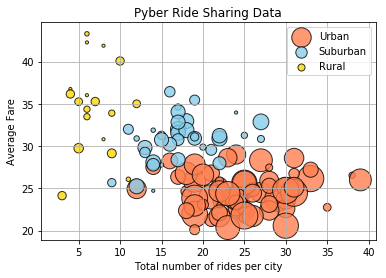

In [38]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, 
            c='coral',
            edgecolor='black', 
            linewidths=1, 
            marker='o',
            alpha=0.8, 
            label='Urban')
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Suburban')
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c='gold',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Rural')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Total number of rides per city")
plt.xlim(0.45)
plt.grid(True)

# Create a legend
lgnd = plt.legend()(frontsize="small", numpoints=1, scatterpoints=1,
                    loc="best", title="City Types")

lgnd.legendhandles[0]._sizes = [30]
lgnd.legendhandles[1]._sizes = [30]
lgnd.legendhandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(40,35)

# Save Figure
plt.savefig("data/fig1.png")

In [39]:
# Show plot
plt.show()

## Total Fares by City Type

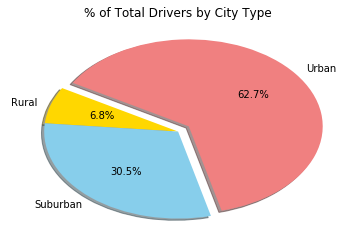

In [47]:

#calculate type percents
type_percents = 100 * city_ride_data.groupby(['type']).sum()['fare'] / city_ride_data['fare'].sum()

#Build Pie Chart
plt.pie(type_percents,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'skyblue', 'lightcoral'],
        autopct='%1.1f%%',
        shadow=True, explode=[0,0,0.1],
        startangle=150)
plt.title('% of Total Drivers by City Type')

#Save Figure
plt.savefig('data/Fig2.png')


In [20]:
# Show Figure
plt.show()

## Total Rides by City Type

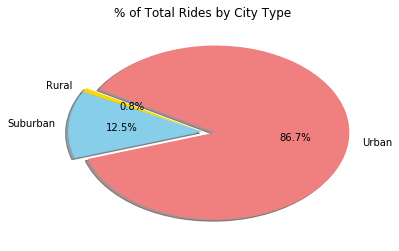

In [50]:

#calculate rides percents
Type_percents = 100 * city_ride_data.groupby(['type']).count()['ride_id'] / city_ride_data['ride_id'].count()

#Build Pie Chart
plt.pie(type_percents,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'skyblue', 'lightcoral'],
        autopct='%1.1f%%',
        shadow=True, explode=[0,0,0.1],
        startangle=150)
plt.title('% of Total Rides by City Type')

#Save Figure
plt.savefig('data/Fig3.png')


In [22]:
# Show Figure
plt.show()

## Total Drivers by City Type

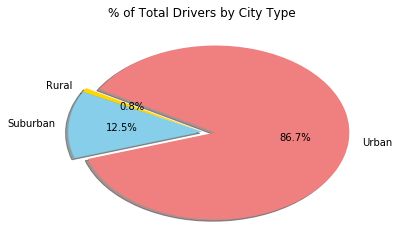

In [49]:
#calculate driver percents
type_percents = 100 * city_ride_data.groupby(['type']).sum()['driver_count'] / city_data['driver_count'].sum()

#Build Pie Chart
plt.pie(type_percents,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'skyblue', 'lightcoral'],
        autopct='%1.1f%%',
        shadow=True, explode=[0,0,0.1],
        startangle=150)
plt.title('% of Total Drivers by City Type')
plt.title('% of Total Drivers by City Type')

#Save Figure
plt.savefig('data/Fig4.png')



In [24]:
# Show Figure
plt.show()

In [ ]:
#Key findings:
#1.  Rural drivers make up the smallest percentage of rides, however the average fares are the highest dollar amount of fares.
#2.  Cities have the highest volume of riders
#3.  Urban rider and drivers make up the vast majority of ride sharing system.    